<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-06-11 02:46:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.5MB/s    in 2.6s    

2025-06-11 02:46:07 (59.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


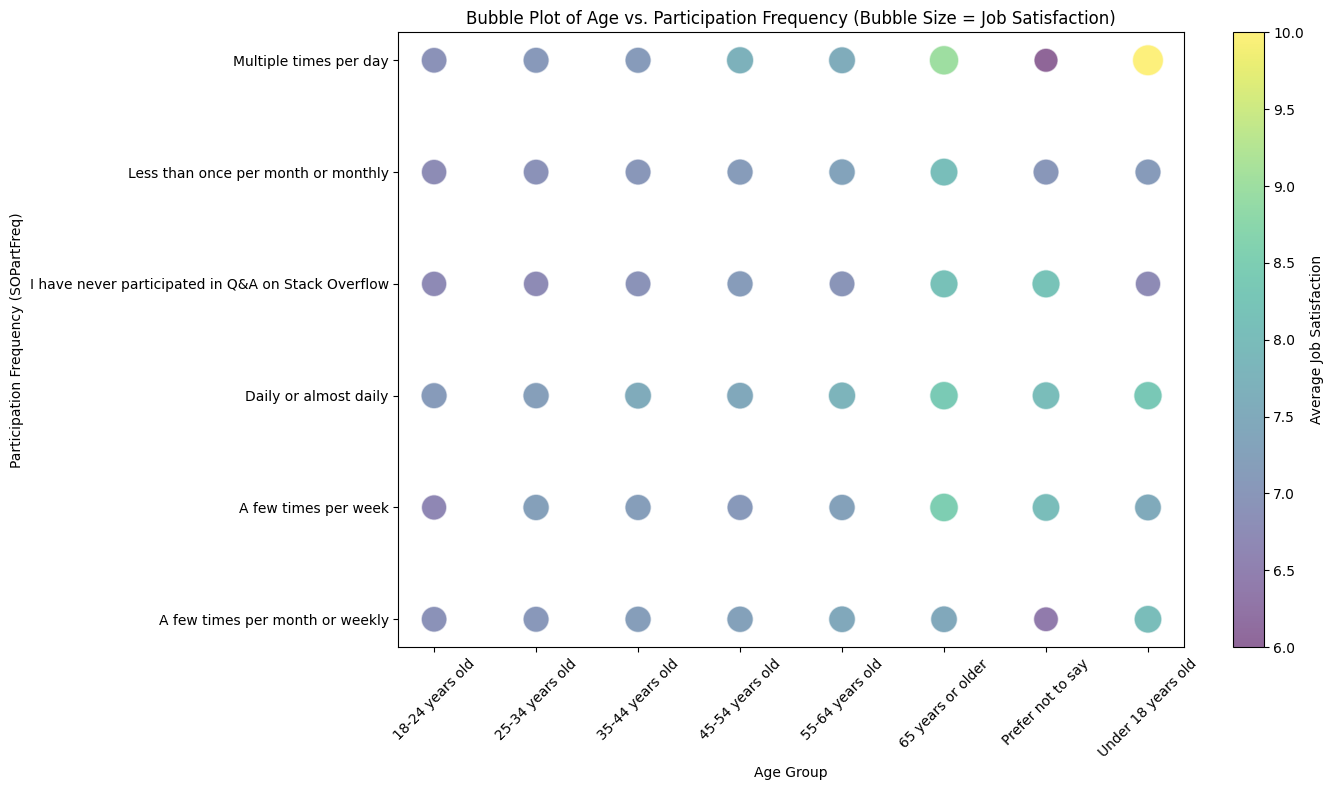

In [5]:
##Write your code 

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Group and aggregate
grouped = df_clean.groupby(['Age', 'SOPartFreq']).agg({
    'JobSat': 'mean',
    'Age': 'count'  # this counts frequency per group
}).rename(columns={'Age': 'Frequency'}).reset_index()

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=grouped['Age'],
    y=grouped['SOPartFreq'],
    s=grouped['JobSat'] *50,  # Adjust multiplier as needed for better size scaling
    alpha=0.6,
    c=grouped['JobSat'],
    cmap='viridis',
    edgecolors='w'
)

plt.title('Bubble Plot of Age vs. Participation Frequency (Bubble Size = Job Satisfaction)')
plt.xlabel('Age Group')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.xticks(rotation=45)
plt.colorbar(scatter, label='Average Job Satisfaction')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


/tmp/ipykernel_2814/1282949082.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeMapped'] = df_clean['Age'].map(age_map)


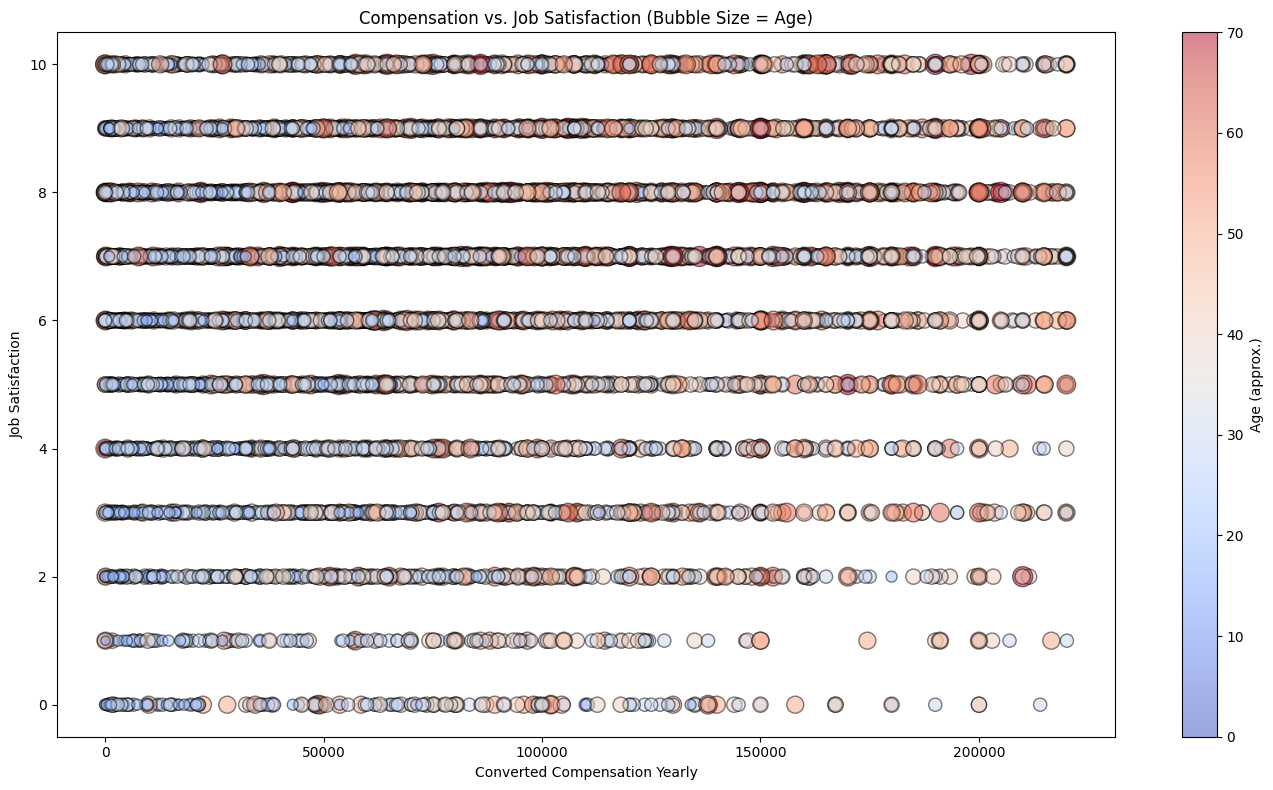

In [8]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
# Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Map Age to numeric scale (midpoints of ranges for bubble size)
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': 0  # Can exclude or give a small default
}
df_clean['AgeMapped'] = df_clean['Age'].map(age_map)

# Drop rows where Age couldn't be mapped
df_clean = df_clean.dropna(subset=['AgeMapped'])

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSat'],
    s=df_clean['AgeMapped'] * 3,  # Adjust multiplier to control bubble size
    alpha=0.5,
    c=df_clean['AgeMapped'],
    cmap='coolwarm',
    edgecolors='k'
)

plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Job Satisfaction')
plt.colorbar(scatter, label='Age (approx.)')
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



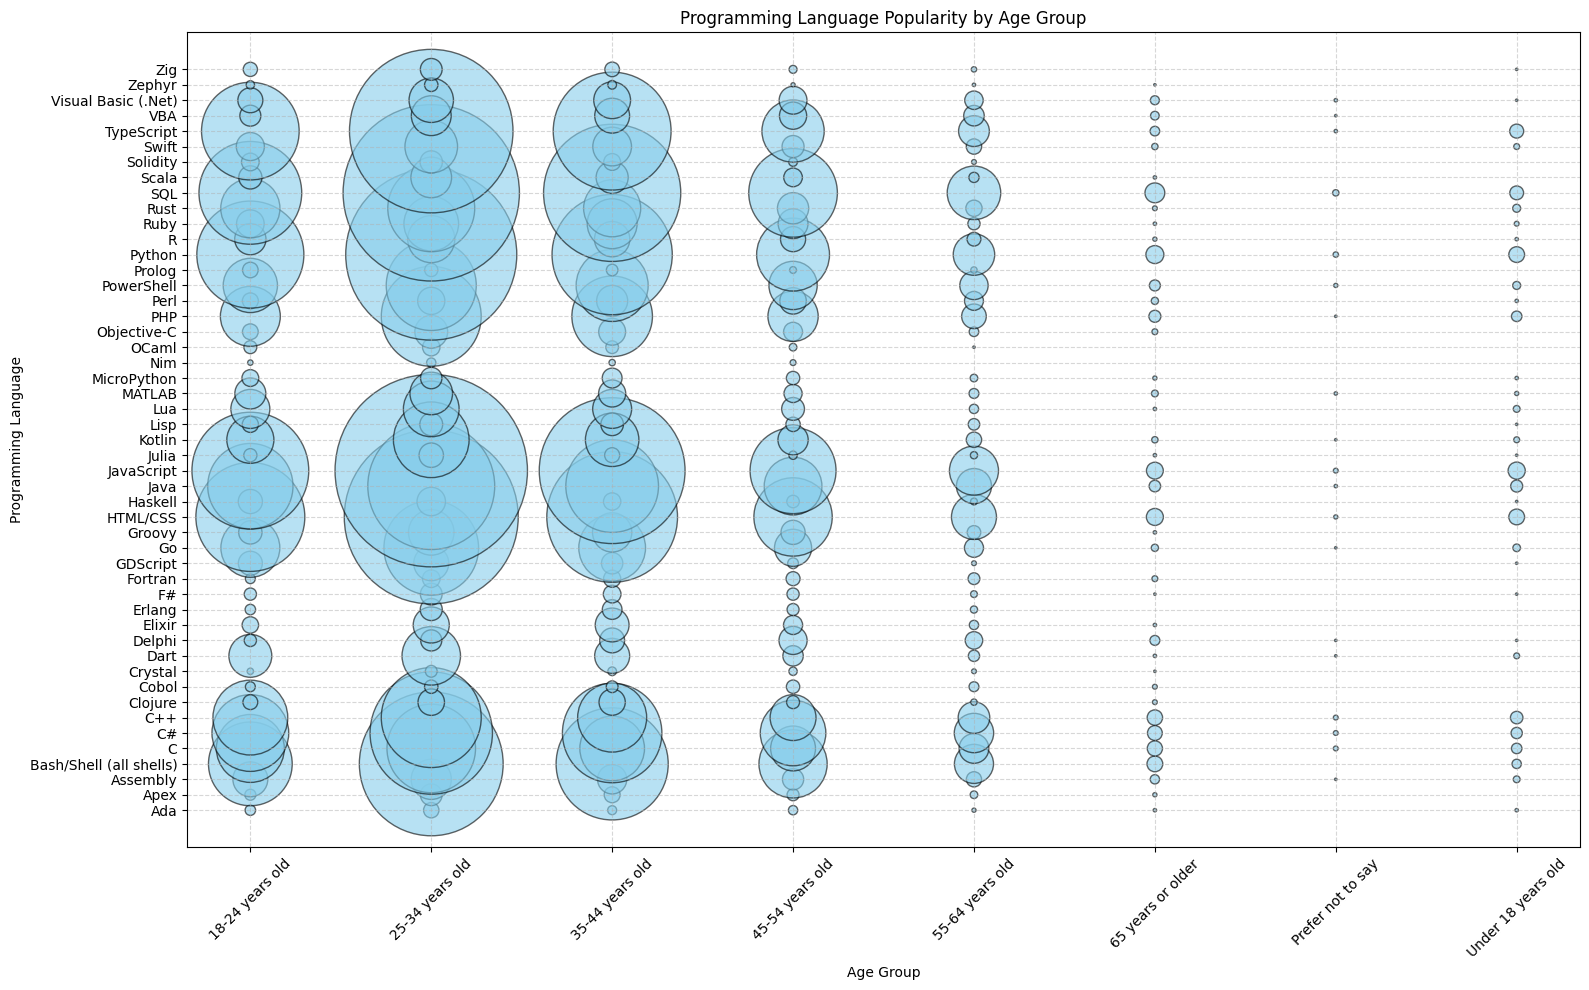

In [9]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Clean the data
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'Age'])

# Split multiple languages into separate rows
df_exploded = df_clean.copy()
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('LanguageHaveWorkedWith')

# Count frequency of each language within each age group
lang_age_freq = df_exploded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Map age categories to ensure consistent order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
lang_age_freq['Age'] = pd.Categorical(lang_age_freq['Age'], categories=age_order, ordered=True)
lang_age_freq = lang_age_freq.dropna(subset=['Age'])

# Plot
plt.figure(figsize=(16, 10))
bubble = plt.scatter(
    x=lang_age_freq['Age'],
    y=lang_age_freq['LanguageHaveWorkedWith'],
    s=lang_age_freq['Frequency'] * 3,  # Adjust bubble size multiplier as needed
    alpha=0.6,
    color='skyblue',
    edgecolors='k'
)

plt.title('Programming Language Popularity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


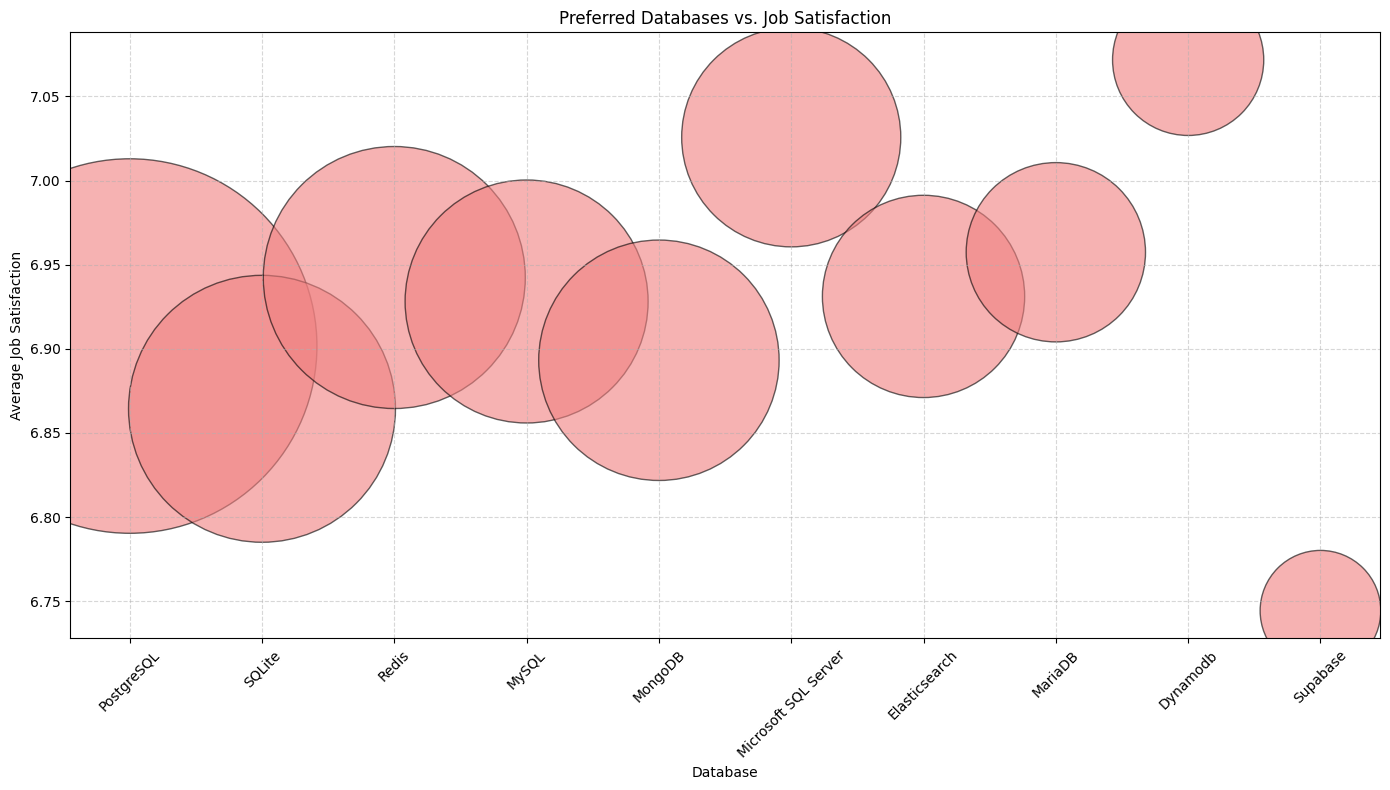

In [10]:
##Write your code 

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Split multiple databases into separate rows
df_exploded = df_clean.copy()
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_exploded.explode('DatabaseWantToWorkWith')

# Group by database to calculate average JobSat and respondent count
db_stats = df_exploded.groupby('DatabaseWantToWorkWith').agg(
    AvgJobSat=('JobSat', 'mean'),
    Count=('JobSat', 'size')
).reset_index()

# Sort by count and keep top 10 databases (optional)
db_stats = db_stats.sort_values('Count', ascending=False).head(10)

# Plot bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=db_stats['DatabaseWantToWorkWith'],
    y=db_stats['AvgJobSat'],
    s=db_stats['Count'] * 10,  # Adjust scaling of bubbles
    alpha=0.6,
    color='lightcoral',
    edgecolors='black'
)

plt.title('Preferred Databases vs. Job Satisfaction')
plt.xlabel('Database')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_2814/1977142188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DevType'] = df_clean['DevType'].str.split(';')


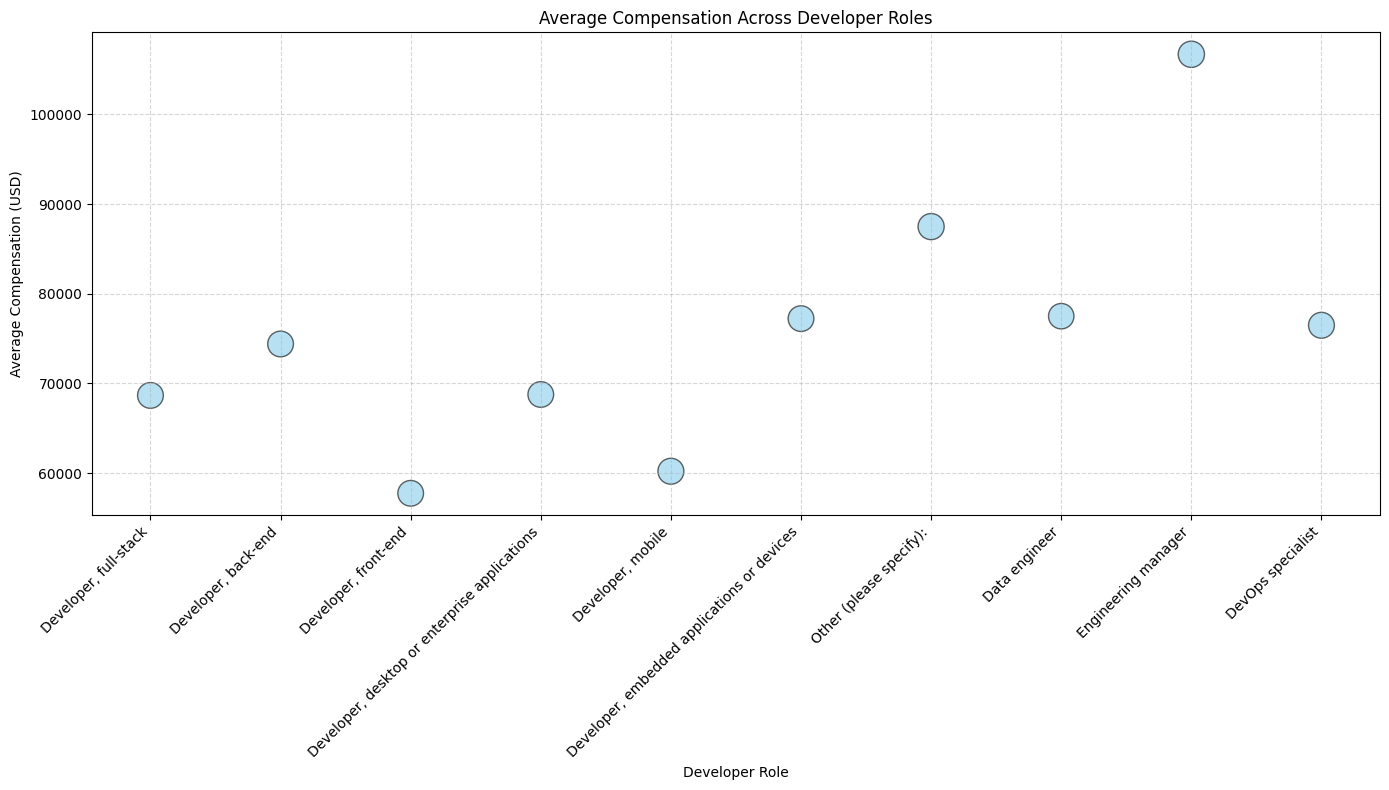

In [11]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Clean and prepare data
df_clean = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])
df_clean['DevType'] = df_clean['DevType'].str.split(';')
df_exploded = df_clean.explode('DevType')

# Group by developer role
role_stats = df_exploded.groupby('DevType').agg(
    AvgComp=('ConvertedCompYearly', 'mean'),
    AvgJobSat=('JobSat', 'mean'),
    Count=('ConvertedCompYearly', 'size')
).reset_index()

# Optional: limit to top 10 by frequency
role_stats = role_stats.sort_values('Count', ascending=False).head(10)

# Plot bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=role_stats['DevType'],
    y=role_stats['AvgComp'],
    s=role_stats['AvgJobSat'] * 50,  # Adjust bubble size for visibility
    alpha=0.6,
    color='skyblue',
    edgecolors='black'
)

plt.title('Average Compensation Across Developer Roles')
plt.xlabel('Developer Role')
plt.ylabel('Average Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_2814/2756850729.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NEWCollabToolsHaveWorkedWith'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')


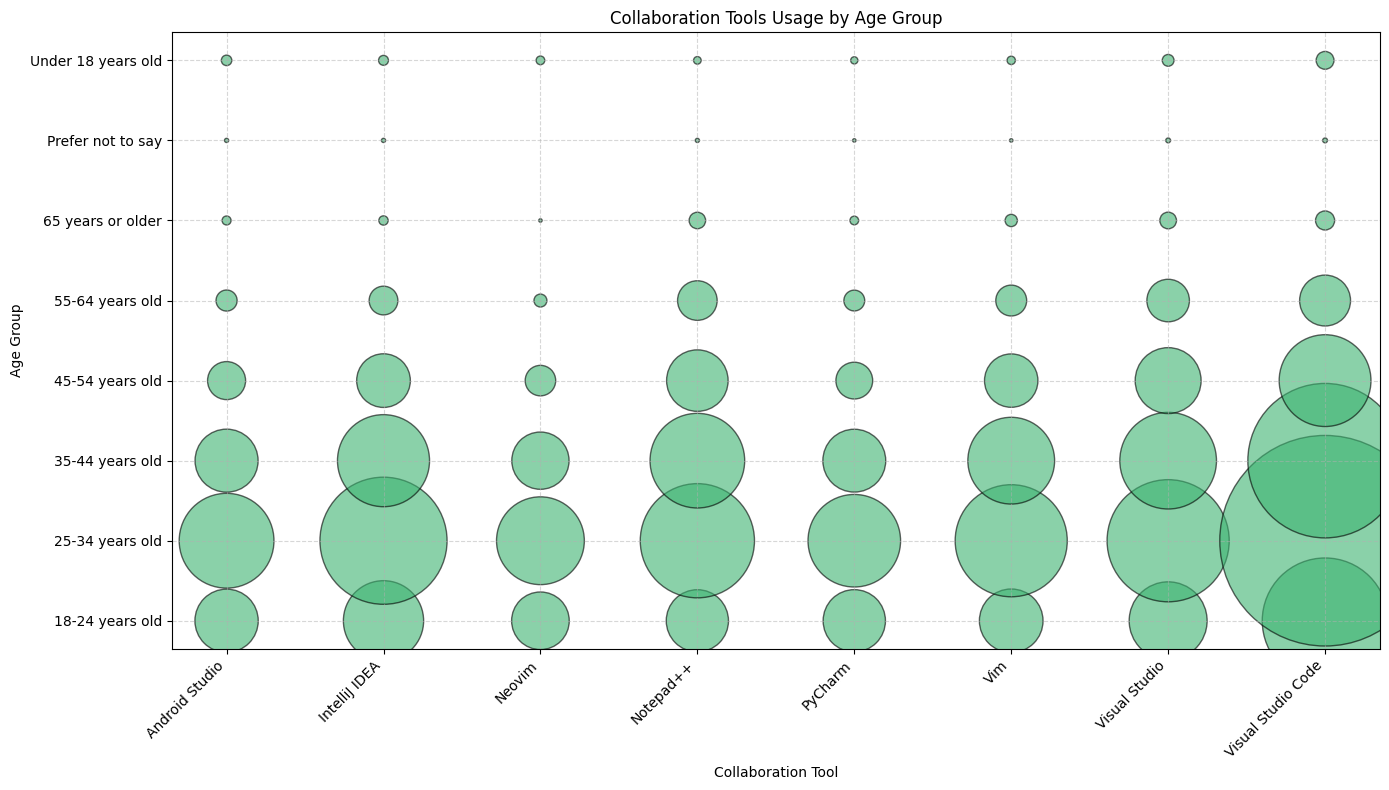

In [13]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values for required columns
df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Split multiple tools into separate rows
df_clean['NEWCollabToolsHaveWorkedWith'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('NEWCollabToolsHaveWorkedWith')

# Group by tool and age
tool_age_freq = df_exploded.groupby(['NEWCollabToolsHaveWorkedWith', 'Age']).size().reset_index(name='Frequency')

# Optional: filter to top 8 most used tools
top_tools = tool_age_freq.groupby('NEWCollabToolsHaveWorkedWith')['Frequency'].sum().nlargest(8).index
tool_age_freq = tool_age_freq[tool_age_freq['NEWCollabToolsHaveWorkedWith'].isin(top_tools)]

# Plot bubble chart
plt.figure(figsize=(14, 8))
plt.scatter(
    x=tool_age_freq['NEWCollabToolsHaveWorkedWith'],
    y=tool_age_freq['Age'],
    s=tool_age_freq['Frequency'] * 3,  # Adjust bubble size scaling
    alpha=0.6,
    color='mediumseagreen',
    edgecolors='black'
)

plt.title('Collaboration Tools Usage by Age Group')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



/tmp/ipykernel_2814/3197436311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')


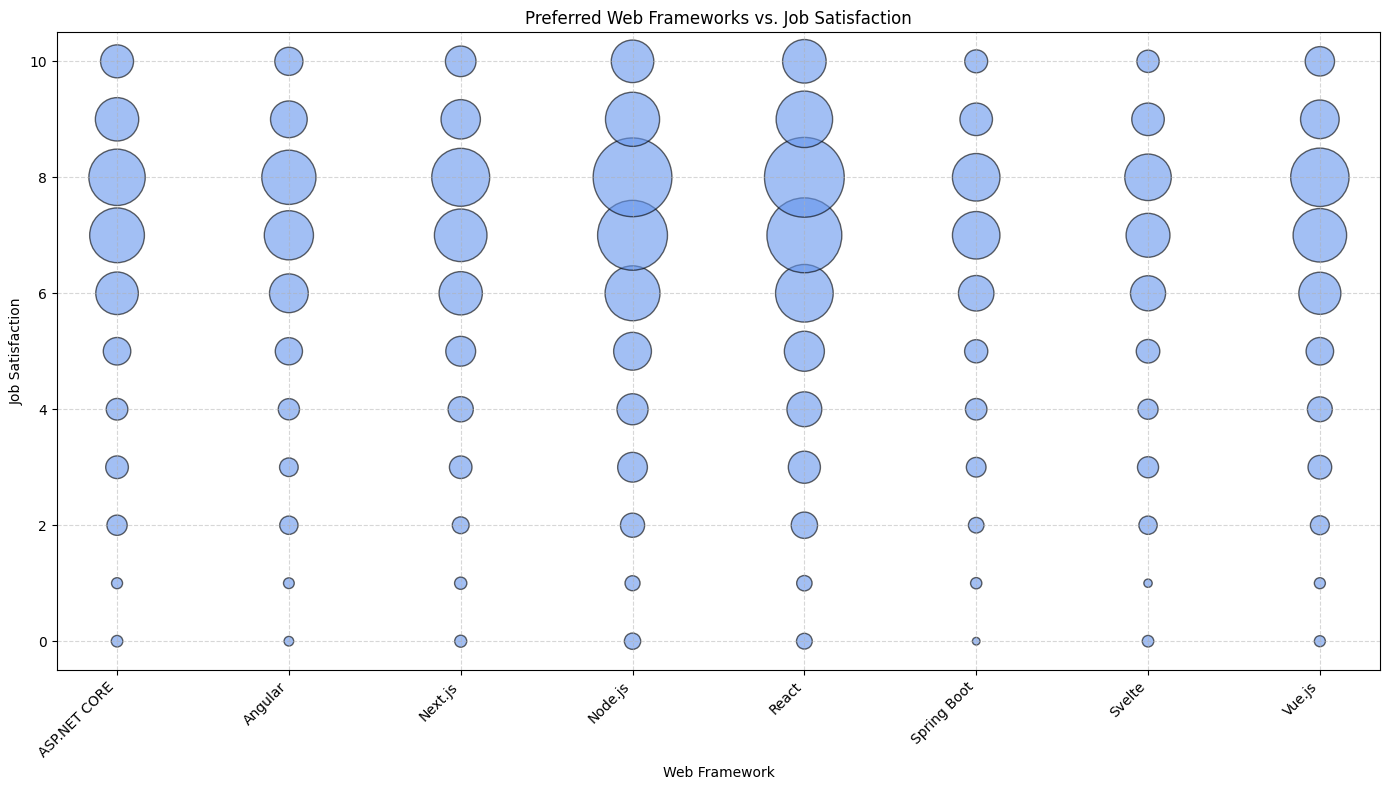

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in the necessary columns
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Split the semicolon-separated frameworks into separate rows
df_clean['WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('WebframeWantToWorkWith')

# Group by framework and job satisfaction to get counts
grouped = df_exploded.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

# Optional: filter to top 8 most popular frameworks overall
top_frameworks = grouped.groupby('WebframeWantToWorkWith')['Frequency'].sum().nlargest(8).index
grouped = grouped[grouped['WebframeWantToWorkWith'].isin(top_frameworks)]

# Plot the bubble chart
plt.figure(figsize=(14, 8))
plt.scatter(
    x=grouped['WebframeWantToWorkWith'],
    y=grouped['JobSat'],
    s=grouped['Frequency'] * 3,  # Adjust bubble size scale
    alpha=0.6,
    color='cornflowerblue',
    edgecolors='black'
)

plt.title('Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



/tmp/ipykernel_2814/3962158347.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')


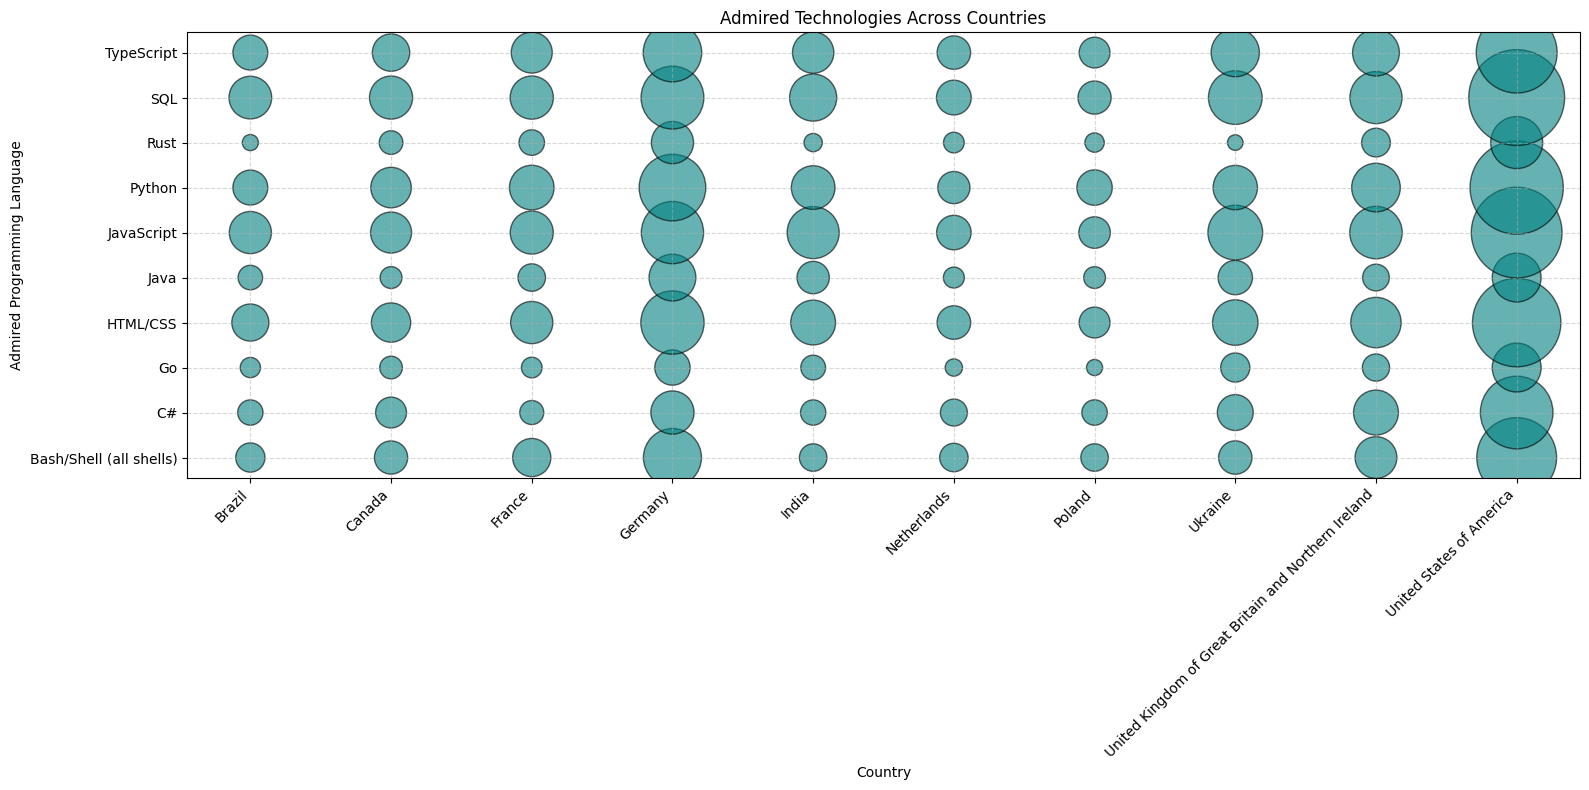

In [15]:
##Write your code 

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in required columns
df_clean = df.dropna(subset=['LanguageAdmired', 'Country'])

# Split semicolon-separated lists into individual rows
df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')
df_exploded = df_clean.explode('LanguageAdmired')

# Group by Country and LanguageAdmired, then count
grouped = df_exploded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')

# Optional: filter to top 10 countries and top 10 admired languages for readability
top_countries = grouped.groupby('Country')['Frequency'].sum().nlargest(10).index
top_languages = grouped.groupby('LanguageAdmired')['Frequency'].sum().nlargest(10).index
filtered = grouped[(grouped['Country'].isin(top_countries)) & (grouped['LanguageAdmired'].isin(top_languages))]

# Plot bubble chart
plt.figure(figsize=(16, 8))
plt.scatter(
    x=filtered['Country'],
    y=filtered['LanguageAdmired'],
    s=filtered['Frequency'] * 3,  # Adjust bubble size scale
    alpha=0.6,
    color='teal',
    edgecolors='black'
)

plt.title('Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('Admired Programming Language')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
